In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
nb_classes = 10

In [7]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [9]:
W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [10]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

In [37]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [38]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [39]:
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch: 0001, Cost: 3.854130026
Epoch: 0002, Cost: 1.511093066
Epoch: 0003, Cost: 1.158255626
Epoch: 0004, Cost: 0.996387113
Epoch: 0005, Cost: 0.897373057
Epoch: 0006, Cost: 0.827545065
Epoch: 0007, Cost: 0.775665474
Epoch: 0008, Cost: 0.734492206
Epoch: 0009, Cost: 0.700880961
Epoch: 0010, Cost: 0.672782625
Epoch: 0011, Cost: 0.648973007
Epoch: 0012, Cost: 0.628366023
Epoch: 0013, Cost: 0.610165244
Epoch: 0014, Cost: 0.594369573
Epoch: 0015, Cost: 0.580037854
Learning finished
Accuracy:  0.8741
Label:  [3]
Prediction:  [3]


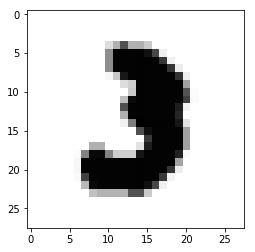

In [44]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
            
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
    print("Learning finished")
    
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()